In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [3]:
def load_spectrum_flie(dir_path):
    data = []
    label = []
    file_dir_list = os.listdir(dir_path)
    for file_dir in file_dir_list:
        file_list = os.listdir(dir_path + '/' + file_dir)
        for filename in file_list:
            file_path = dir_path + '/' + file_dir + '/' + filename
            x, y = np.loadtxt(file_path, dtype=float, comments='#', delimiter=',', unpack=True)
            data.append(y)
            label.append(file_dir)
    return data, label

In [68]:
print('Loading data...')
dir_path = '../animal_blood/Transmissive_processed_data_padding'
# dir_path = '../Dataset_1'
data, label = load_spectrum_flie(dir_path)
data = np.array(data)
le = LabelEncoder()
labels = le.fit_transform(label)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.7, test_size=0.3, stratify=labels, shuffle=True)
print("Completed!")

Loading data...
Completed!


In [69]:
gnb = GaussianNB().fit(train_data, train_labels)
acc_score = gnb.score(test_data, test_labels)           # 0.8249
print("Accuracy:", acc_score)

# Dataset_1  0.8255
# animal_blood_orginal_classify  0.4343
# animal_blood_preprocessing_classify  0.9393
# Reflective_processed_data_padding  0.2989
# Transmissive_processed_data_padding  0.4588

Accuracy: 0.4588688946015424


In [48]:
# 查看预测结果
Y_pred = gnb.predict(test_data)
Y_pred

array([ 0, 32, 36, ..., 30, 30, 14])

In [49]:
# 预测的概率结果
prob = gnb.predict_proba(test_data)
prob.shape

(1569, 46)

In [50]:
prob[1, :].sum()

1.0

In [51]:
# 每一行的和都是一
prob.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [52]:
# 混淆矩阵查看贝叶斯分类结果
from sklearn.metrics import confusion_matrix as CM
CM(test_labels, Y_pred)

array([[11,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  3, ...,  5,  0, 10],
       [ 0,  0, 19, ...,  9,  0,  0],
       ...,
       [ 0,  0,  2, ..., 18,  0,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  1,  0, ...,  0,  0, 14]])

In [53]:
# 定义绘制学习曲线函数
def plot_learning_curve(estimator, title, X, y
                       , ax
                       , ylim = None
                       , cv = None
                       , n_jobs = None):
    train_sizes, train_scores, test_scores = learning_curve(estimator
                                                           , X, y
                                                           , cv=cv
                                                           , n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
           , color='r', label='Training score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color='g', label='Test score')
    ax.legend(loc='best')
    return ax

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
title = 'Naive Bayes'
model = GaussianNB()
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

/Users/renpengju/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


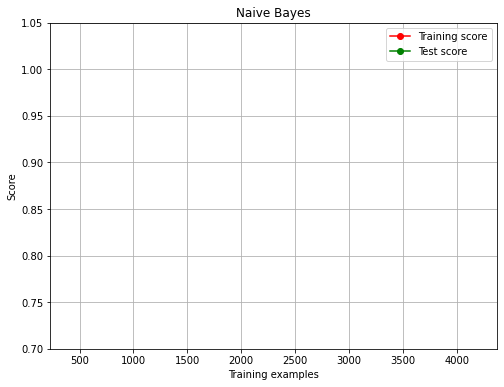

In [55]:
# 绘制学习曲线
fig, axes = plt.subplots(figsize=(8, 6))
plot_learning_curve(model, title, data, labels
                   , ax=axes, ylim=[0.7, 1.05]
                   , n_jobs=4, cv=cv)
plt.show()

In [56]:
# 对数似然函数
from sklearn.metrics import log_loss
log_loss(test_labels, prob)

23.989627371292844

In [57]:
prob_pos = gnb.predict_proba(test_data)[:, 1]

In [58]:
import pandas as pd
df = pd.DataFrame({'ytrue': test_labels[:500], 'probability': prob_pos[:500]})

In [59]:
# 多项式贝叶斯
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [60]:
mms = MinMaxScaler().fit(train_data)
Xtrain_ = mms.transform(train_data)
Xtest_ = mms.transform(test_data)

In [61]:
mnb = MultinomialNB().fit(Xtrain_, train_labels)


In [62]:
mnb.class_log_prior_

array([-3.53238959, -3.95672318, -3.95672318, -5.16069599, -3.55125808,
       -3.29256354, -3.95672318, -2.86768035, -3.98571072, -3.95672318,
       -5.16069599, -3.55125808, -3.57048944, -3.55125808, -3.61009858,
       -3.55125808, -3.55125808, -5.16069599, -5.16069599, -5.16069599,
       -3.57048944, -5.16069599, -3.55125808, -5.0271646 , -5.16069599,
       -3.95672318, -3.59009791, -5.16069599, -3.55125808, -3.55125808,
       -5.16069599, -3.55125808, -3.55125808, -3.55125808, -3.263576  ,
       -3.95672318, -3.95672318, -5.16069599, -3.57048944, -3.64087023,
       -3.2852375 , -3.55125808, -3.82319179, -3.55125808, -5.16069599,
       -3.97111192])

In [63]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [64]:
mnb.score(Xtest_, test_labels)

# animal_blood_orginal_classify  0.7474
# animal_blood_preprocessing_classify  0.9292
# Reflective_processed_data_padding  0.4875

0.4875717017208413

In [66]:
# 伯努利朴素贝叶斯
from sklearn.naive_bayes import BernoulliNB

bnl_ = BernoulliNB().fit(Xtrain_, train_labels)
bnl_.score(Xtest_, test_labels)

0.05736137667304015

In [67]:
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, train_labels)
bnl.score(Xtest_, test_labels)

0.15487571701720843